## Quantum Kernels and SVM for breast_cancerr data set 
XX FeatureMap with 1,2,3,4,5 repetions and digits class = 9 and number of  training samples = 300, test samples =60
date : 18/08/22

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Scikit learn imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Qiskit imports
from qiskit import Aer, execute, IBMQ
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.visualization import plot_histogram

## Data
The Data we are using is handwritten digits dataset, which is avaliable through scikit-learn


In [2]:
#load digits dataset
breast_cancer = datasets.load_breast_cancer()

Data preporcessing.

In [3]:
#split dataset
XTrain, Xtest, YTrain, Ytest = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=22)

#Reduce dimesnions
n_dim = 5
pca = PCA(n_components=n_dim).fit(XTrain)
XTrain = pca.transform(XTrain)
Xtest = pca.transform(Xtest)

#Normalise
std_scale = StandardScaler().fit(XTrain)
XTrain = std_scale.transform(XTrain)
Xtest = std_scale.transform(Xtest)

#Scale
samples = np.append(XTrain, Xtest, axis=0)

minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
XTrain = minmax_scale.transform(XTrain)
Xtest = minmax_scale.transform(Xtest)

#Select
train_size = 300
XTrain = XTrain[:train_size]
YTrain = YTrain[:train_size]


test_size = 60
Xtest = Xtest[:test_size]
Ytest = Ytest[:test_size]

print(XTrain[0], YTrain[0])
print(Xtest[0], Ytest[0])


[-0.67877167 -0.32887698 -0.64391848 -0.50048413  0.20973561] 0
[-0.68758509  0.0201601  -0.71602497  0.1402525   0.22277054] 1


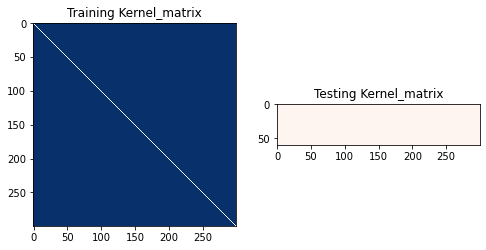

Callable kernel classification test score:0.5833333333333334
linear Kernel Classification test score: 0.97
poly Kernel Classification test score: 0.95
rbf Kernel Classification test score: 0.95
sigmoid Kernel Classification test score: 0.78


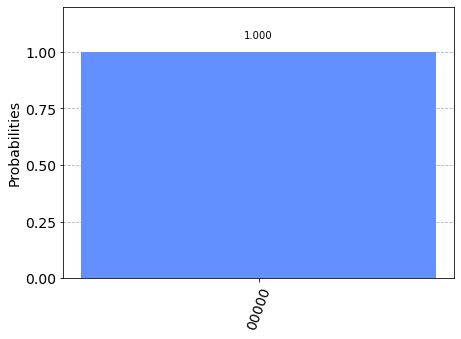

In [4]:
map_pauli = PauliFeatureMap(feature_dimension = 5, reps=1, paulis = ['X','X'])
#map_pauli.decompose().draw('mpl')
xx_map = PauliFeatureMap(feature_dimension = 5, reps=1, entanglement='linear', insert_barriers=True, paulis = ['X','X'])
xx_kernel = QuantumKernel(feature_map=xx_map, quantum_instance=Aer.get_backend('statevector_simulator'))

xx_circuit = xx_kernel.construct_circuit(XTrain[0], XTrain[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(xx_circuit, backend, shots=8192, seed_simulator=1024,  seed_transpiler=1024)
counts = job.result().get_counts(xx_circuit)
#counts['00000']/sum(counts.values())
plot_histogram(counts)

matrix_train =  xx_kernel.evaluate(x_vec=XTrain)
matrix_test = xx_kernel.evaluate(x_vec=Xtest, y_vec=XTrain)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel_matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel_matrix")
plt.show()

xxcb_svc = SVC(kernel=xx_kernel.evaluate)
xxcb_svc.fit(XTrain, YTrain)
xxcb_score = xxcb_svc.score(Xtest, Ytest)

print(f'Callable kernel classification test score:{xxcb_score}')

classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(XTrain, YTrain)
    classical_score = classical_svc.score(Xtest, Ytest)
    
    print('%s Kernel Classification test score: %0.2f' %(kernel, classical_score))
plot_histogram(counts)

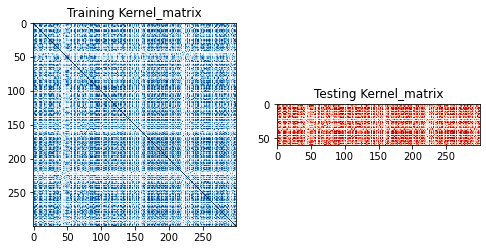

Callable kernel classification test score:0.9333333333333333
linear Kernel Classification test score: 0.97
poly Kernel Classification test score: 0.95
rbf Kernel Classification test score: 0.95
sigmoid Kernel Classification test score: 0.78


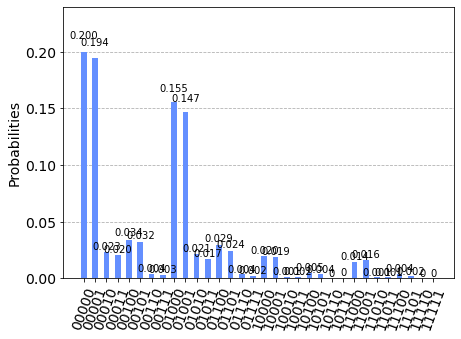

In [5]:
map_pauli = PauliFeatureMap(feature_dimension = 5, reps=2, paulis = ['X','X'])
#map_pauli.decompose().draw('mpl')
xx_map = PauliFeatureMap(feature_dimension = 5, reps=2, entanglement='linear', insert_barriers=True, paulis = ['X','X'])
xx_kernel = QuantumKernel(feature_map=xx_map, quantum_instance=Aer.get_backend('statevector_simulator'))

xx_circuit = xx_kernel.construct_circuit(XTrain[0], XTrain[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(xx_circuit, backend, shots=8192, seed_simulator=1024,  seed_transpiler=1024)
counts = job.result().get_counts(xx_circuit)
#counts['00000']/sum(counts.values())
plot_histogram(counts)

matrix_train =  xx_kernel.evaluate(x_vec=XTrain)
matrix_test = xx_kernel.evaluate(x_vec=Xtest, y_vec=XTrain)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel_matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel_matrix")
plt.show()

xxcb_svc = SVC(kernel=xx_kernel.evaluate)
xxcb_svc.fit(XTrain, YTrain)
xxcb_score = xxcb_svc.score(Xtest, Ytest)

print(f'Callable kernel classification test score:{xxcb_score}')

classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(XTrain, YTrain)
    classical_score = classical_svc.score(Xtest, Ytest)
    
    print('%s Kernel Classification test score: %0.2f' %(kernel, classical_score))

plot_histogram(counts)    

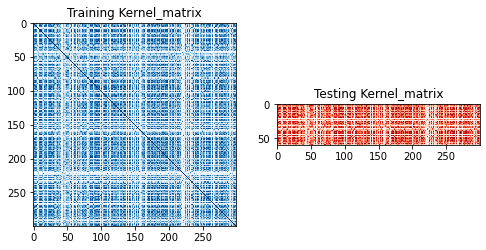

Callable kernel classification test score:0.95
linear Kernel Classification test score: 0.97
poly Kernel Classification test score: 0.95
rbf Kernel Classification test score: 0.95
sigmoid Kernel Classification test score: 0.78


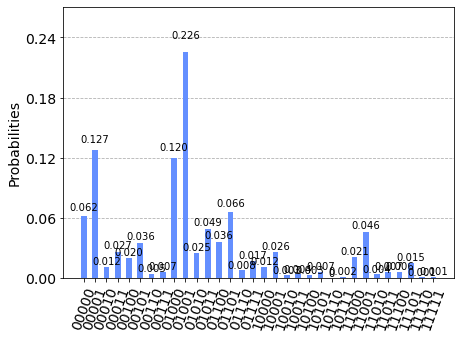

In [6]:
    
map_pauli = PauliFeatureMap(feature_dimension = 5, reps=3, paulis = ['X','X'])
#map_pauli.decompose().draw('mpl')
xx_map = PauliFeatureMap(feature_dimension = 5, reps=3, entanglement='linear', insert_barriers=True, paulis = ['X','X'])
xx_kernel = QuantumKernel(feature_map=xx_map, quantum_instance=Aer.get_backend('statevector_simulator'))

xx_circuit = xx_kernel.construct_circuit(XTrain[0], XTrain[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(xx_circuit, backend, shots=8192, seed_simulator=1024,  seed_transpiler=1024)
counts = job.result().get_counts(xx_circuit)
#counts['00000']/sum(counts.values())
#plot_histogram(counts)

matrix_train =  xx_kernel.evaluate(x_vec=XTrain)
matrix_test = xx_kernel.evaluate(x_vec=Xtest, y_vec=XTrain)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel_matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel_matrix")
plt.show()

xxcb_svc = SVC(kernel=xx_kernel.evaluate)
xxcb_svc.fit(XTrain, YTrain)
xxcb_score = xxcb_svc.score(Xtest, Ytest)

print(f'Callable kernel classification test score:{xxcb_score}')

classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(XTrain, YTrain)
    classical_score = classical_svc.score(Xtest, Ytest)
    
    print('%s Kernel Classification test score: %0.2f' %(kernel, classical_score))
    
plot_histogram(counts)

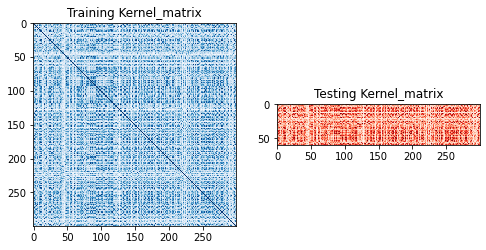

Callable kernel classification test score:0.8333333333333334
linear Kernel Classification test score: 0.97
poly Kernel Classification test score: 0.95
rbf Kernel Classification test score: 0.95
sigmoid Kernel Classification test score: 0.78


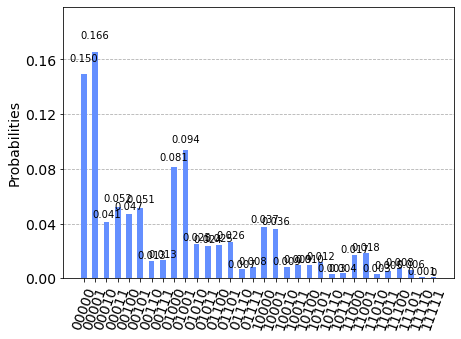

In [7]:
 
map_pauli = PauliFeatureMap(feature_dimension = 5, reps=4, paulis = ['X','X'])
#map_pauli.decompose().draw('mpl')
xx_map = PauliFeatureMap(feature_dimension = 5, reps=4, entanglement='linear', insert_barriers=True, paulis = ['X','X'])
xx_kernel = QuantumKernel(feature_map=xx_map, quantum_instance=Aer.get_backend('statevector_simulator'))

xx_circuit = xx_kernel.construct_circuit(XTrain[0], XTrain[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(xx_circuit, backend, shots=8192, seed_simulator=1024,  seed_transpiler=1024)
counts = job.result().get_counts(xx_circuit)
#counts['00000']/sum(counts.values())


matrix_train =  xx_kernel.evaluate(x_vec=XTrain)
matrix_test = xx_kernel.evaluate(x_vec=Xtest, y_vec=XTrain)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel_matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel_matrix")
plt.show()

xxcb_svc = SVC(kernel=xx_kernel.evaluate)
xxcb_svc.fit(XTrain, YTrain)
xxcb_score = xxcb_svc.score(Xtest, Ytest)

print(f'Callable kernel classification test score:{xxcb_score}')

classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(XTrain, YTrain)
    classical_score = classical_svc.score(Xtest, Ytest)
    
    print('%s Kernel Classification test score: %0.2f' %(kernel, classical_score))
    
plot_histogram(counts)

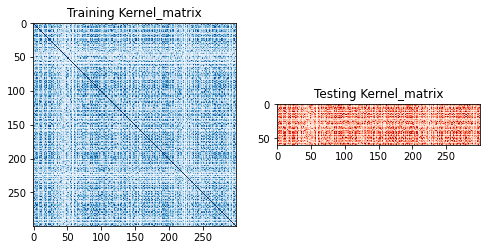

Callable kernel classification test score:0.8666666666666667
linear Kernel Classification test score: 0.97
poly Kernel Classification test score: 0.95
rbf Kernel Classification test score: 0.95
sigmoid Kernel Classification test score: 0.78


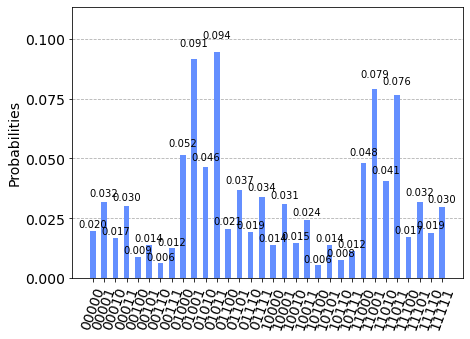

In [8]:
 
map_pauli = PauliFeatureMap(feature_dimension = 5, reps=5, paulis = ['X','X'])
#map_pauli.decompose().draw('mpl')
xx_map = PauliFeatureMap(feature_dimension = 5, reps=5, entanglement='linear', insert_barriers=True, paulis = ['X','X'])
xx_kernel = QuantumKernel(feature_map=xx_map, quantum_instance=Aer.get_backend('statevector_simulator'))

xx_circuit = xx_kernel.construct_circuit(XTrain[0], XTrain[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(xx_circuit, backend, shots=8192, seed_simulator=1024,  seed_transpiler=1024)
counts = job.result().get_counts(xx_circuit)
#counts['00000']/sum(counts.values())


matrix_train =  xx_kernel.evaluate(x_vec=XTrain)
matrix_test = xx_kernel.evaluate(x_vec=Xtest, y_vec=XTrain)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel_matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel_matrix")
plt.show()

xxcb_svc = SVC(kernel=xx_kernel.evaluate)
xxcb_svc.fit(XTrain, YTrain)
xxcb_score = xxcb_svc.score(Xtest, Ytest)

print(f'Callable kernel classification test score:{xxcb_score}')

classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel)
    classical_svc.fit(XTrain, YTrain)
    classical_score = classical_svc.score(Xtest, Ytest)
    
    print('%s Kernel Classification test score: %0.2f' %(kernel, classical_score))

plot_histogram(counts)